In [13]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

import warnings
warnings.filterwarnings("ignore")

from lib import *

In [14]:
train_data_set = np.load("fashion_train.npy")
test_data_set = np.load("fashion_test.npy")


# We have 10000 images in the training set
len(train_data_set)

# To find classification for each element, the last value in the set is:
# 0 for T-shirt/top
# 1 for Trousers
# 2 for Pullover
# 3 for Dress
# 4 for Shirt
len(train_data_set[0])

785

In [15]:
# We need to clean the array, as the last value is the classification. Let's first save these separately.

train_classes = []

for i in range(len(train_data_set)):
    train_classes.append(train_data_set[i][784])
      
train_classes = np.array(train_classes)
#train_classes = train_classes.reshape(-1, 1)


test_classes = []

for i in range(len(test_data_set)):
    test_classes.append(test_data_set[i][784])
      
test_classes = np.array(test_classes)
#test_classes = test_classes.reshape(-1, 1)

In [16]:
# Now we can delete the last element and have a cleaned training set that we can work with.

cleaned_train_set = np.empty((len(train_data_set), 784), dtype=np.uint8)

for i in range(len(train_data_set)):
    temp = np.delete(train_data_set[i], 784)
    cleaned_train_set[i] = temp
    
    
cleaned_test_set = np.empty((len(test_data_set), 784), dtype=np.uint8)

for i in range(len(test_data_set)):
    temp = np.delete(test_data_set[i], 784)
    cleaned_test_set[i] = temp

## Cleaning the data

Our code has a few pixel values that are very close to 0 (thus background), that we remove to reduce the noise in our dataset.

In [5]:
# Cleaning values close to 0 to reduce noise in the images.

for i in cleaned_train_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0
            
            
for i in cleaned_test_set:
    for j in range(784):
        if i[j] < 14:
            i[j] = 0

In [17]:
# We reshape it so that the 1D array becomes a 2D 28x28 array.
cleaned_train_set_reshaped = cleaned_train_set.reshape(-1, 28, 28)
cleaned_test_set_reshaped = cleaned_test_set.reshape(-1, 28, 28)

In [18]:
# Two simple functions for working with our data

def show_image(index_num):
    '''
    Simple function for showing the image and printing the category.
    
    index_num: The index you would like to show.
    '''
    img = cleaned_train_set_reshaped[index_num]
    #img2 = np.invert(img)
    plt.imshow(np.invert(img), cmap ='gray', vmin = 0, vmax = 255)
    plt.show()
    text = ""

    cloth_cat = train_classes[index_num]
    if cloth_cat == 0:
        text = "0: This is a t-shirt/top"
    if cloth_cat == 1:
        text = "1: This is a pair of trousers"
    if cloth_cat == 2:
        text = "2: This is a pullover"
    if cloth_cat == 3:
        text = "3: This is a dress"
    if cloth_cat == 4:
        text = "4: This is a shirt"
    
    #print(text)
    return text
        
def count_categories(categories):
    '''
    Another stupidly simple function for counting the categories.
    
    categories: The numpy array of all categories, corresponding to index number.
    '''  
    ze_val = on_val = tw_val = th_val = fo_val = 0
    
    for i in categories:
        if i == 0:
            ze_val += 1
        if i == 1:
            on_val += 1
        if i == 2:
            tw_val += 1
        if i == 3:
            th_val += 1
        if i == 4:
            fo_val += 1
    
    print(f'There are {ze_val} t-shirts/tops. There are {on_val} pairs of trousers. There are {tw_val} pullovers. There are {th_val} dresses. There are {fo_val} shirts.')
    

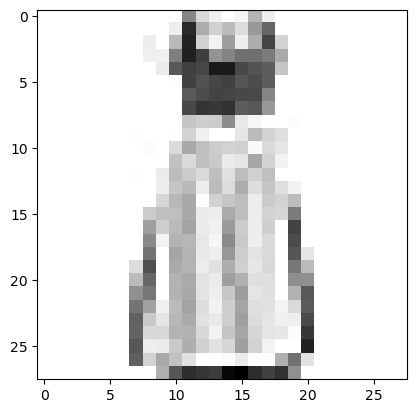

'3: This is a dress'

In [19]:
show_image(random.randint(0, 9999))

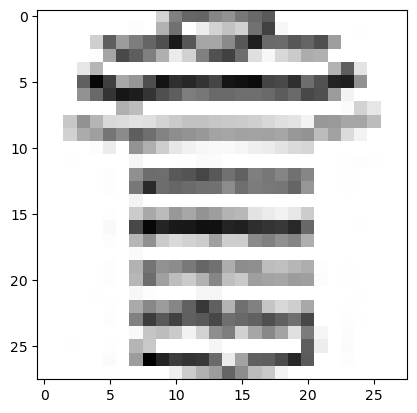

There are 2033 t-shirts/tops. There are 1947 pairs of trousers. There are 2001 pullovers. There are 2005 dresses. There are 2014 shirts.


In [20]:
show_image(55)

count_categories(train_classes)

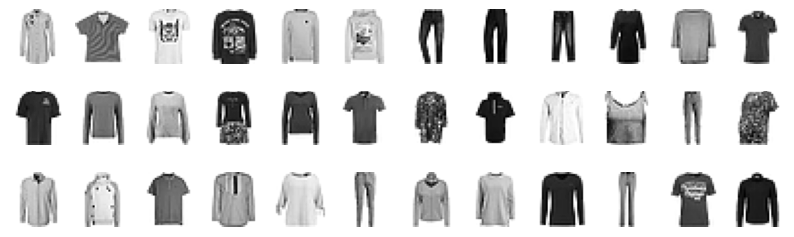

In [21]:
fig, axarr = plt.subplots( 3, 12, figsize=(10, 3))
ax = plt.Axes(fig, [0, 0, 1, 1.])
for y, a in enumerate(axarr[1]):
    axarr[0,y].set_axis_off()
    axarr[1,y].set_axis_off()
    axarr[2,y].set_axis_off()
    axarr[0,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[1,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')
    axarr[2,y].imshow((np.invert(cleaned_train_set_reshaped[random.randint(0,9999)])), cmap='gray')

In [22]:
print(cleaned_train_set_reshaped.shape)
print(cleaned_test_set_reshaped.shape)

(10000, 28, 28)
(5000, 28, 28)


## Plotting the data

Transformed data shape: (10000, 20)
Explained variance ratio: [0.32309944 0.16269657 0.07730526 0.04168682 0.032853   0.02237558
 0.01941181 0.01781261 0.01496688 0.01272808 0.01136404 0.00969832
 0.00832406 0.00743112 0.00731417 0.00677256 0.00669187 0.00636737
 0.00565884 0.00503449]


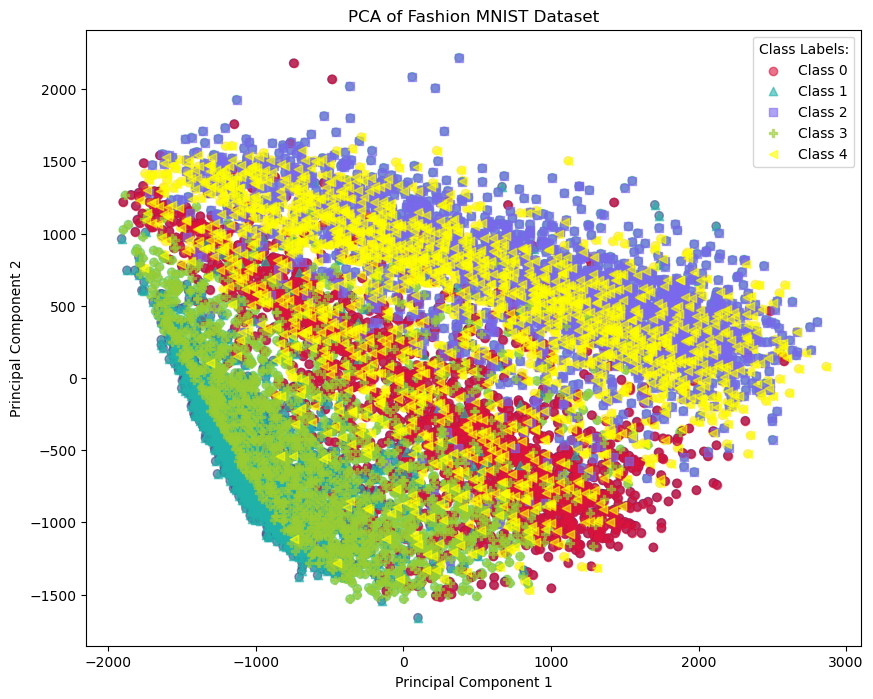

In [23]:
# Perform PCA
pca = PCA(n_components=20)  # You can adjust this number if needed
pca_train_result = pca.fit_transform(cleaned_train_set)

# Print the shapes and explained variance ratio
print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    plt.scatter(pca_2d[mask, 0], pca_2d[mask, 1], 
                color=colors[i],
                marker=markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)
# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Labels:')
plt.title('2-dimensional PCA of Training Dataset')

# Show the plot
plt.show()


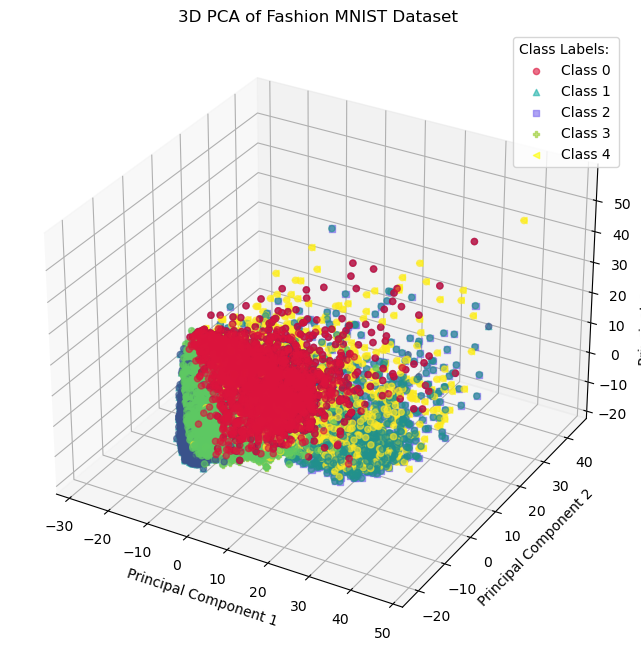

In [39]:
# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    ax.scatter(pca_3d[mask, 0], pca_3d[mask, 1], pca_3d[mask, 2],
                color=colors[i],
               marker = markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3-dimensional PCA of Training Dataset')


ax.legend(title='Class Labels: ')

# Show the plot
plt.show()

The axes' values are very large. Not very useful and can lead to weird model behavior. Therefore, let's do:

## Dimensional reduction using PCA

In [25]:
# We normalise the pixel values of the images to range from 0 to 1
X_train = cleaned_train_set/255
X_test = cleaned_test_set/255

# Not used at the moment, but if we need to reshape our y to be (n, 1)
y_train = train_classes.reshape(-1, 1)
y_test = test_classes.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
stand_X_train = scaler.fit_transform(X_train)

# Also apply standardization to test data
stand_X_test = scaler.transform(X_test)


In [29]:
# Time to find the right number of PCA components, as we want the components to explain 90% of the variance in total.
pca_components = len(stand_X_train[0])
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(stand_X_train)


pca_sum_list = [pca.explained_variance_ratio_[0]]
i = 1

while sum(pca_sum_list) < 0.90:
    pca_sum_list.append(pca.explained_variance_ratio_[0+i])
    i += 1

In [30]:
len(pca_sum_list)

112

#### NOTE: Add a cumulative explained variance by Principal Components graph

In [55]:
# Print the shapes and explained variance ratio
pca_components = len(pca_sum_list)
pca = PCA(pca_components)
pca_train_result = pca.fit_transform(stand_X_train)
pca_test_result = pca.transform(stand_X_test)

print("Transformed data shape:", pca_train_result.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_[:50])

print(f'The sum of our PCA\'s explained variance: {sum(pca.explained_variance_ratio_)}')

Transformed data shape: (10000, 112)
Explained variance ratio: [0.22645698 0.13673557 0.06381166 0.05046707 0.03064291 0.02924805
 0.02197067 0.01880203 0.0147053  0.01416444 0.01298674 0.01232636
 0.01005118 0.00914286 0.00886118 0.00844979 0.00800824 0.0074046
 0.0071842  0.00678097 0.00637763 0.00625898 0.0059261  0.00557587
 0.00524909 0.00501018 0.00489192 0.0047749  0.00451686 0.00424941
 0.00419099 0.00403955 0.00393599 0.00388444 0.00379559 0.00362945
 0.00357774 0.00351893 0.00333661 0.00324689 0.00315795 0.00312242
 0.00298241 0.00291243 0.00277143 0.00273706 0.00264379 0.00258012
 0.00245683 0.00243529]
The sum of our PCA's explained variance: 0.9001516743312389


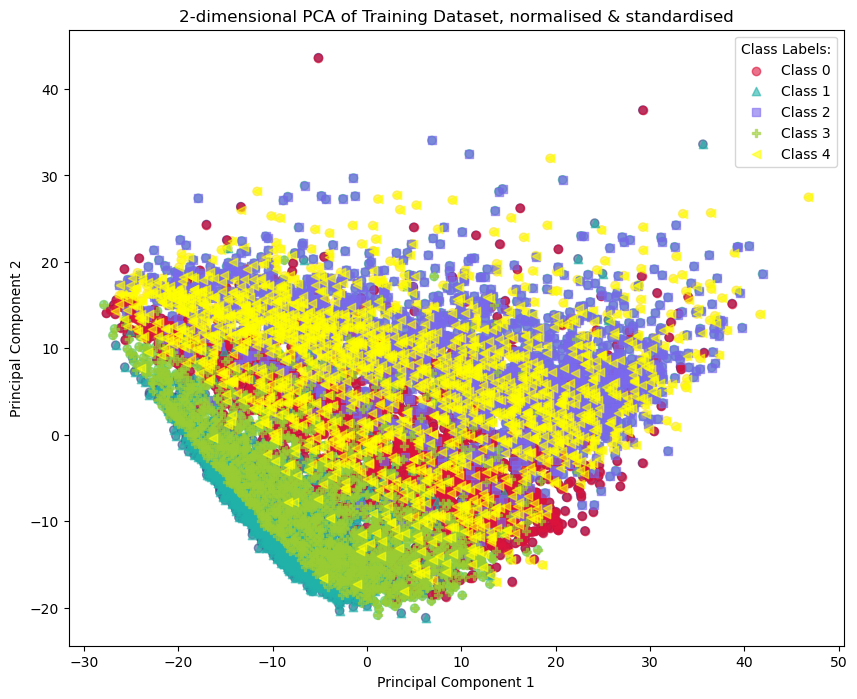

In [42]:
# Visualize the first two principal components
pca_2d = pca_train_result[:, :2]  # Get the first two components

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    plt.scatter(pca_2d[mask, 0], pca_2d[mask, 1], 
                color=colors[i],
                marker=markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class Labels:')
plt.title('2-dimensional PCA of Training Dataset, normalised & standardised')

# Show the plot
plt.show()


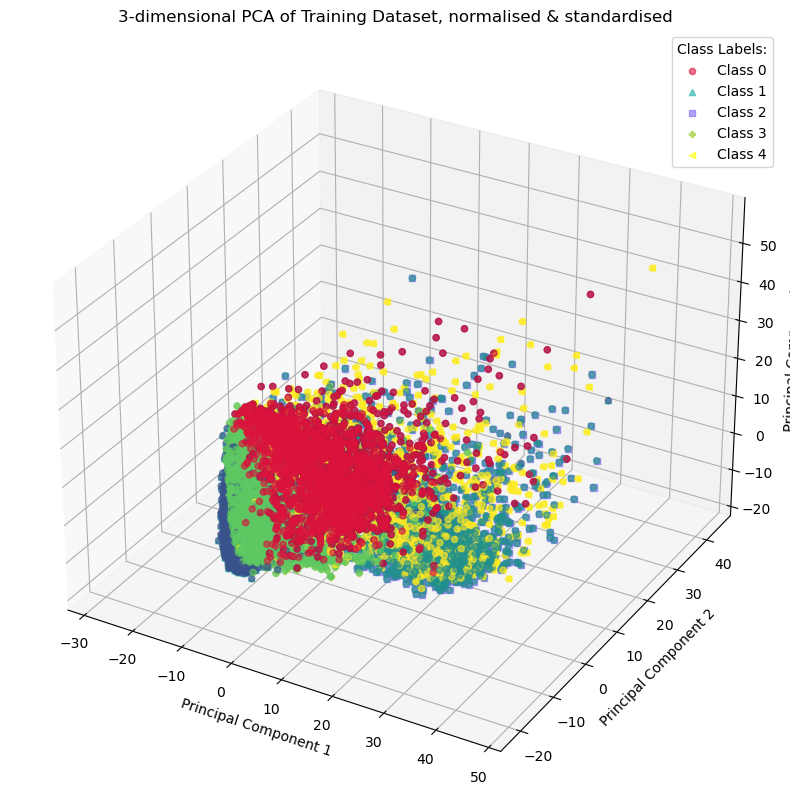

In [44]:
# For an interactive 3D plot, use plotly.express

# Get the first three principal components
pca_3d = pca_train_result[:, :3]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=train_classes, cmap='viridis', alpha=0.6)

colors = ['crimson', 'lightseagreen', 'mediumslateblue', 'yellowgreen', 'yellow']
markers = ['o', '^', 's', 'P', '<']
for i, class_label in enumerate(np.unique(train_classes)):
    mask = train_classes == class_label
    ax.scatter(pca_3d[mask, 0], pca_3d[mask, 1], pca_3d[mask, 2],
                color=colors[i],
               marker = markers[i],
                label=f'Class {class_label}', 
                alpha=0.6)

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3-dimensional PCA of Training Dataset, normalised & standardised')

ax.legend(title='Class Labels:')

# Show the plot
plt.show()

In [20]:
# TO BE DONE: Find a method that gives the lowest test error rate (and not training error rate) (p. 35) Lets get started on KNN
# 

In [56]:
# Load training data
X, y = pca_train_result, train_classes
X_test, y_test = pca_test_result, test_classes

classifier_dec_tree = DecisionTreeClassifier()


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25)

In [59]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

7500
7500
2500
2500
5000
5000


In [62]:
class TreeNode:
    def __init__(self, predicted_class, depth=None):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None
        self.leftbranch = False
        self.rightbranch = False
        self.depth = depth

class DecisionTreeClassifierNP:
    # Reference: Chris Jakuc - https://medium.com/@cjakuc/building-a-decision-tree-classifier-c00a08815c3
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        
        
    def fit(self, X:np.array, y:np.array):
        self.num_classes = len(np.unique(y))
        self.num_features = X.shape[1]
        self.tree = self.grow_tree(X, y)
        
    def find_split(self, X, y):
        ideal_col = None
        ideal_threshold = None
        
        
        num_observations = y.size
        if num_observations <= 1:
            return ideal_col, ideal_threshold
        
        y = y.reshape(num_observations,)
        
        # Supress warnings
        #with warnings.catch_warnings():
        #    warnings.filterwarnings(action='ignore', category=FutureWarning)
        count_in_parent = [np.count_nonzero(y == c) for c in range(self.num_classes)]
        
        best_gini = 1.0 - sum((n / num_observations) ** 2 for n in count_in_parent)
        
        
        # Creating a temp version of y for concatenating below
        temp_y = y.reshape(y.shape[0], 1)
        
        for col in range(self.num_features):
            temp_X = X[:, col].reshape(num_observations, 1)
            all_data = np.concatenate((temp_X, temp_y), axis = 1)
            sorted_data = all_data[np.argsort(all_data[:, 0])]
            thresholds, obs_classes = np.array_split(sorted_data, 2, axis = 1)
            obs_classes = obs_classes.astype(int)
            
            num_left = [0] * self.num_classes
            num_right = count_in_parent.copy()
            
            for i in range(1, num_observations):
                class_ = obs_classes[i-1][0]
                num_left[class_] += 1
                num_right[class_] -= 1
                gini_left = 1.0 - sum((num_left[x] / i) ** 2 for x in range(self.num_classes))
                gini_right = 1.0 - sum((num_right[x] / (num_observations - i)) ** 2 for x in range(self.num_classes))
                gini = (i * gini_left + (num_observations - i) * gini_right) / num_observations
                
                if thresholds[i][0] == thresholds[i-1][0]:
                    continue
                    
                
                if gini < best_gini:
                    best_gini = gini
                    ideal_col = col
                    ideal_threshold = (thresholds[i][0] + thresholds[i-1][0]) / 2
        
        return ideal_col, ideal_threshold
    
    
    def grow_tree(self, X, y, depth=0):
        #with warnings.catch_warnings():
        #    warnings.filterwarnings(action='ignore', category = FutureWarning)
        pop_per_class = [np.count_nonzero(y == i) for i in range(self.num_classes)]
            
        predicted_class = np.argmax(pop_per_class)
        
        node = TreeNode(predicted_class=predicted_class, depth=depth)
        node.samples = y.size
        
        if depth < self.max_depth:
            col, threshold = self.find_split(X, y)
            if col and threshold:
                indices_left = X[:, col] < threshold
                X_left, y_left = X[indices_left], y[indices_left]
                indices_right = X[:, col] >= threshold
                X_right, y_right = X[indices_right], y[indices_right]
                node.feature_index = col
                node.threshold = threshold
                node.left = self.grow_tree(X_left, y_left, depth+1)
                node.left.leftbranch = True
                node.right = self.grow_tree(X_right, y_right, depth+1)
                node.right.rightbranch = True
        
        return node
    
    def predict(self, X_test):
        node = self.tree
        predictions = []
        for obs in X_test:
            node = self.tree
            while node.left:
                if obs[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions.append(node.predicted_class)
        return np.array(predictions)


In [63]:
testing_tree = DecisionTreeClassifierNP(max_depth = 10)
testing_tree.fit(X_train, y_train)

In [64]:
predictions = testing_tree.predict(X_val)

(2500,)

In [67]:
classifier_dec_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
classifier_dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [68]:
predictions_scikit = classifier_dec_tree.predict(X_val)

(2500,)

In [70]:
# To check our metrics, we use sklearn.
from sklearn.metrics import accuracy_score, classification_report

In [71]:
print("Accuracy:", accuracy_score(y_val, predictions))
print(classification_report(y_val, predictions))

Accuracy: 0.7488
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       524
           1       0.88      0.90      0.89       488
           2       0.75      0.72      0.74       478
           3       0.77      0.86      0.81       479
           4       0.60      0.54      0.57       531

    accuracy                           0.75      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.74      0.75      0.75      2500



In [72]:
print("Accuracy:", accuracy_score(y_val, predictions_scikit))
print(classification_report(y_val, predictions_scikit))

Accuracy: 0.7512
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       524
           1       0.94      0.90      0.92       488
           2       0.74      0.76      0.75       478
           3       0.78      0.84      0.81       479
           4       0.58      0.53      0.55       531

    accuracy                           0.75      2500
   macro avg       0.75      0.76      0.75      2500
weighted avg       0.75      0.75      0.75      2500



In [37]:
class FF_Neural_Network:
    # REFERENCE: https://khelli07.medium.com/feedforward-neural-network-fnn-implementation-from-scratch-using-python-467f51ecca3d
    def __init__(self, x:np.array, y:np.array, number_of_samples = None, labels = None):
        self.x = x
        self.y = y
        self.number_of_samples = len(x[0])
        self.labels = np.unique(y)
        
    def ReLU_forward(self, inputs):
        self.inputs = inputs
        return np.maximum(0, inputs, dtype=np.float64)
    
    def ReLU_backward(self, inputs):
        return np.array(inputs > 0, dtype = np.float64)
    
    def cost_forward(self, ypred, ytrue):
        return 1 / 2 * (np.sum(np.square(ytrue-ypred)))
    
    def cost_backward(self, ypred, ytrue):
        '''
        Reason this is so simple is because the partial derivative of the cost function in 
        regards to the predicted value, which is actually the activation of the last layer = ypred - ytrue
        '''
        return ypred - ytrue
    
    def softmaxing_forward(self, input_of_output, z_array):
        return np.exp(input_of_output)/sum(np.exp(z_array))
 

        #self.softmaxing_forward(z[2][i], z[2])
    #def softmaxing_backward(self, ):
        
    
    #def loss_forward(self, ytrue, ypred):
        
        
        
    #def loss_backward(self, ):
        
        
    
    def neuron_setup(self):
        number_of_layers = int(input("How many hidden layers would you like in total? "))
        number_of_layers += 1
        print(f"number of layers: {number_of_layers}")
        print()
        neurons = []
        neurons.append(int(pca_components))
        for i in range(number_of_layers-1):
            neurons.append(int(input(f"How many would you like in hidden layer number {i+1}? ")))
        neurons.append(len(self.labels))
                
        print(f"Your neurons set-up: {neurons}")
                
        return neurons, number_of_layers
        
    
    def epoch(self):
        neurons, number_of_layers = self.neuron_setup()
        num_of_epochs = int(input("How many epochs would you like to run? "))
        lr = 1e-4 # 0.0001 = 10^-4
        # Grid search for learning, try each from 10^-4 to 10^3 to find the best learning rate
        z = []
        a = []
        w = []
        b = []
        
        # Forward Propagation
        for i in range(number_of_layers):
            w.append(np.random.randn(neurons[i+1], neurons[i]))
            b.append(np.ones((neurons[i+1], 1)))
            if a:
                z.append(w[i] @ a[i-1] + b[i])
            else:
                z.append(w[i] @ self.x[0] + b [i])
            a.append(self.ReLU_forward(z[i]))
            break
            
            #assert a[i].shape == (neurons[i+1], self.number_of_samples)
            
        # Backward Propagation
        for i in range(number_of_layers-1, 0, -1):
            if i == number_of_layers-1:
                delta = self.cost_backward((a[i][0]), self.y) * self.ReLU_backward(z[i])
            else:
                delta = (w[i+1].T @ delta) * self.ReLU_backward(z[i])
                
            if i != 0:
                w[i] = w[i] - lr * (delta @ a[i-1].T)
            else:
                w[i] = w[0] - lr * (delta @ self.x[0].T)
            b[i] = b[i] - lr * (delta)
            
            
        for i in range(1, num_of_epochs):
            # Forward propagation
            for j in range(number_of_layers):
                if j == 0:
                    z[j] = w[j] @ self.x[i] + b[j]
                else:
                    z[j] = w[j] @ a[j - 1] + b[j]        

                a[j] = self.ReLU_forward(z[j])     

            print(f"Epoch ({i + 1}/{num_of_epochs}), loss = {self.cost_forward(a[2], self.labels)}")    
            # Backward propagation
            for j in range(number_of_layers - 1, -1, -1):
                if j == number_of_layers - 1:
                    delta = self.cost_backward(a[j][0], self.y) * self.ReLU_backward(z[j])
                else:
                    delta = (w[j + 1].T @ delta) * self.ReLU_backward(z[j]) 
                    
                print(f"This is delta: {delta}")
                print(f"This is self.x[i].T: {self.x[i].T}")

                if j == 0:
                    w[j] = w[j] - lr * (delta @ self.x[i].T)
                else:
                    w[j] = w[j] - lr * (delta @ a[j - 1].T)        

                b[j] = b[j] - lr * (delta)

In [38]:
test_class = FF_Neural_Network(X_train, y_train)

In [39]:
test_class.epoch()

How many hidden layers would you like in total? 


ValueError: invalid literal for int() with base 10: ''

In [ ]:
len(X_train[0])

In [ ]:
# For making a Convolution Neural Network, we can use the python library Keras or TensorFlow(much easier!! Use this)
# After implementation, find a convolution matrix #and use ConfusionMatrixDisplay for graphic display